# More on the 1D DFT

In [3]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

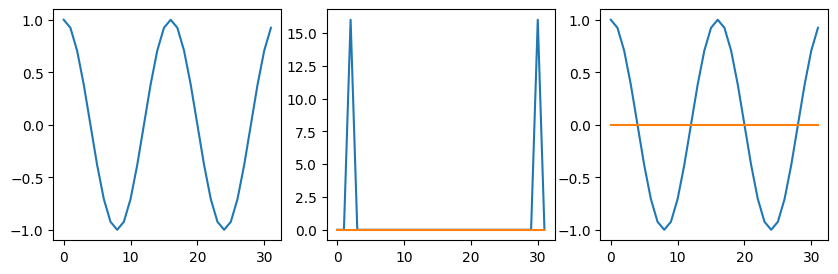

<Figure size 640x480 with 0 Axes>

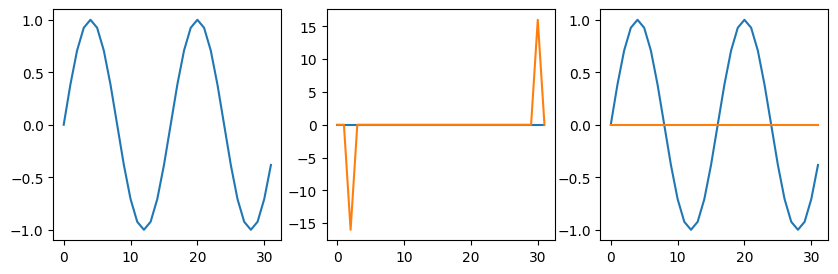

<Figure size 640x480 with 0 Axes>

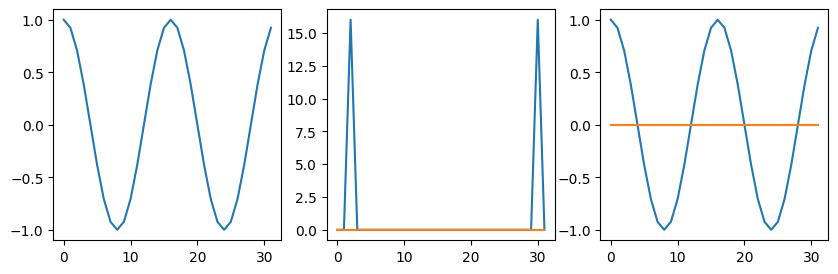

<Figure size 640x480 with 0 Axes>

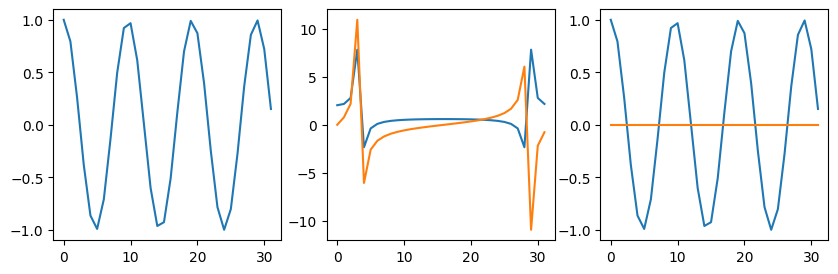

In [41]:
def do_plots(f):
    g = np.fft.fft(f)
    
    plt.clf()
    fig = plt.figure(figsize=(10,3))

    plt.subplot(131)
    plt.plot(x, f)

    plt.subplot(132)
    plt.plot(x, np.real(g))
    plt.plot(x, np.imag(g))

    plt.subplot(133)
    h = np.fft.ifft(g)
    plt.plot(x, np.real(h))
    plt.plot(x, np.imag(h))

    plt.show()


# Question 1
# Look at sin(kx) and cos(kx)

n = 32
x = np.linspace(0,n-1,n)
dx = x[1]-x[0]

k = 2*np.pi * (2/n)
do_plots(np.cos(k*x))

do_plots(np.sin(k*x))


# when we add n to the frequency, we get the same answer
# the result is aliased back into our range
k = 2*np.pi * (2/n + n)
do_plots(np.cos(k*x))

# a non-integer frequency gives leakage into other bins
# the discontinuity at the boundaries leads to high freq components
k = 2*np.pi * 3.33/n
do_plots(np.cos(k*x))

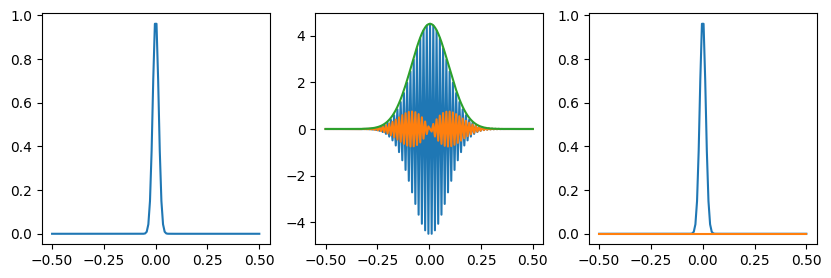

Parseval check: 3.18341790878128 3.18341790878128 0.0


<Figure size 640x480 with 0 Axes>

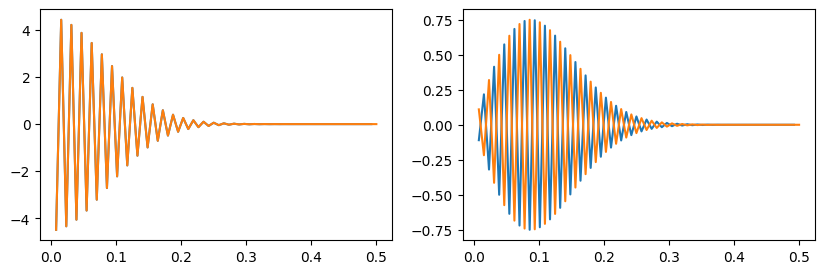

In [39]:
# Gaussian
n = 128
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x-0)**2/(0.02**2))
g = np.fft.fft(f)

fig = plt.figure(figsize=(10,3))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
gs = np.fft.fftshift(g)
plt.plot(x, np.real(gs))
plt.plot(x, np.imag(gs))
plt.plot(x, np.abs(gs))

plt.subplot(133)
# Check the inverse transform
h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))
plt.show()

# Check Parseval's theorem
sumf = np.sum(np.abs(f)**2)
sumg = np.sum(np.abs(g)**2)/n
print('Parseval check:', sumf, sumg, sumf-sumg)

plt.clf()
# This shows that the real part is symmetric about k=0
# but the imaginary part is anti-symmetric; therefore F(-k) = F^*(k)
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
k = np.fft.fftfreq(n)
plt.plot(k[k>0], np.real(g[k>0]))
plt.plot(-k[k<0], np.real(g[k<0]))

plt.subplot(122)
plt.plot(k[k>0], np.imag(g[k>0]))
plt.plot(-k[k<0], np.imag(g[k<0]))


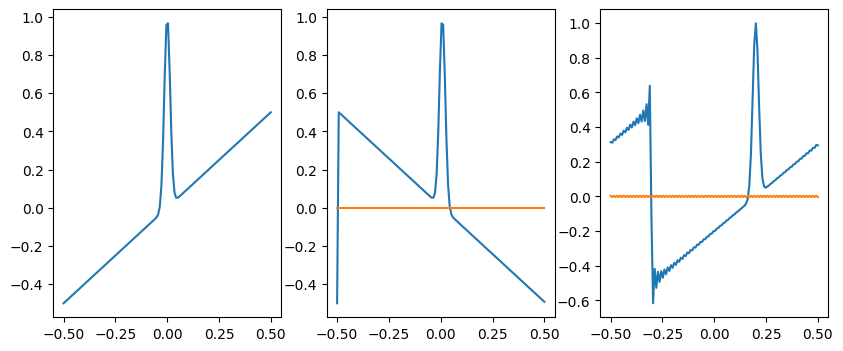

In [21]:
# Question 2: manipulating f(x) by changing F(k)

n = 128
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x-0)**2/(0.02**2)) + x
g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
# complex conjugate is equivalent to x->-x
h = np.fft.ifft(np.conjugate(g))
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))

plt.subplot(133)
# add a gradient in phase is equivalent to a translation in x
j = complex(0,1)
k = (2*np.pi/dx) * np.fft.fftfreq(n)
g = g * np.exp(-j * k * 0.2)

h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))
plt.show()

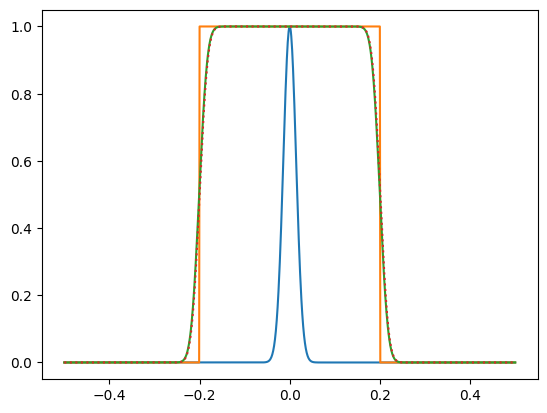

In [20]:
# Question 3: convolution
import scipy.signal

def convolution(f,g):
    ft = np.fft.fft(f)
    gt = np.fft.fft(g)
    return np.fft.ifft(ft*gt)

n = 1024
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x)**2/(0.02**2))
g = np.zeros_like(x)
g[(x>-0.2)&(x<0.2)] = 1

plt.plot(x,f)
plt.plot(x,g)
h = convolution(g,f)
h = np.roll(h, n//2)  # shift the result to centre it
plt.plot(x,np.real(h)/np.max(np.real(h)))

# Compare against the scipy convolution function
h = scipy.signal.convolve(g,f, mode='same')
plt.plot(x,h/np.max(h),':')


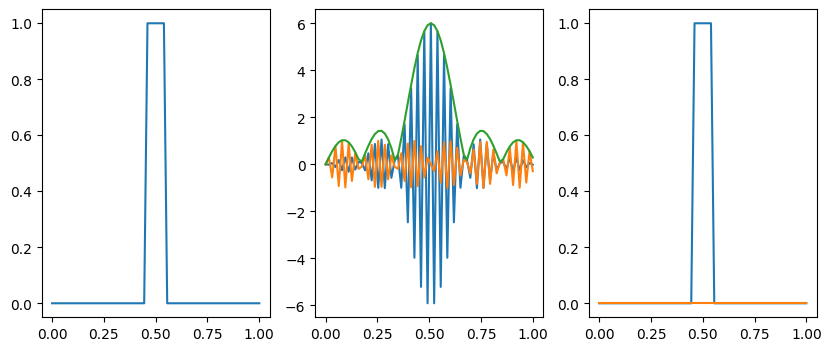

In [6]:
# This wasn't one of the questions, but have a look at the 
# top hat <-> sinc function transform
n = 64
x = np.linspace(0,1,n)
dx = x[1]-x[0]

f = np.zeros_like(x)
f[(x>0.45)&(x<0.55)] = 1

g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
gs = np.fft.fftshift(g)
plt.plot(x, np.real(gs))
plt.plot(x, np.imag(gs))
plt.plot(x, np.abs(gs))

plt.subplot(133)

h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))

plt.show()

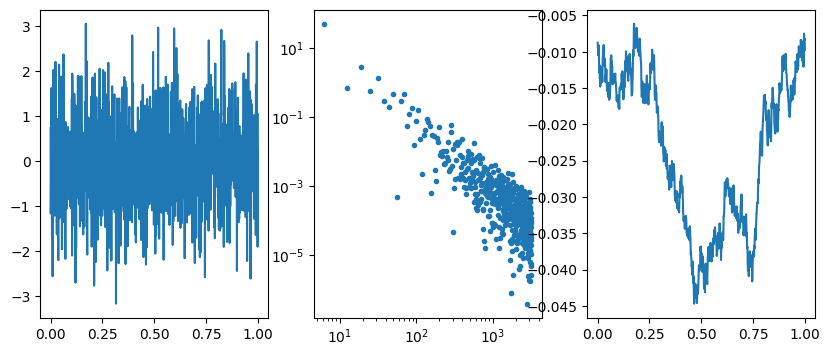

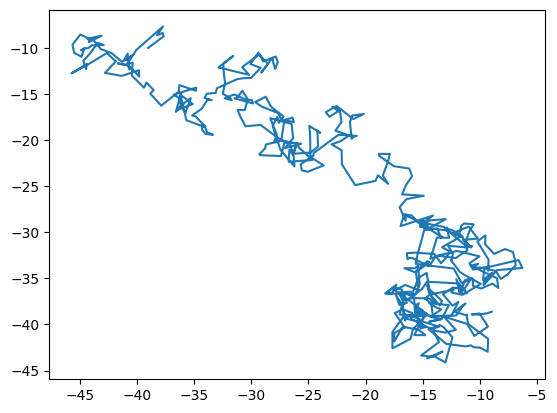

In [7]:
# Question 4: red noise and random walk

n = 1024
x = np.linspace(0,1,n)
dx = x[1]-x[0]

f = np.random.randn(n)

g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
g2 = g.copy()
j = complex(0,1)
k = (2*np.pi/dx) * np.fft.fftfreq(n)
g2[1:] /= j*k[1:]

plt.plot(k[k>0], np.abs(g2[k>0])**2, '.')
plt.yscale('log')
plt.xscale('log')

plt.subplot(133)

h = np.fft.ifft(g2)
plt.plot(x, np.real(h))
#plt.plot(x, np.imag(h))

plt.show()

plt.clf()
plt.plot(np.real(h[:n//2])/dx, np.real(h[n//2:])/dx)
plt.show()

In this question, we generate a sample of red noise which has a power spectrum $1/k^2$ by taking the Fourier transform of white noise (flat power spectrum) and dividing the Fourier transorm by $ik$. This is equivalent to integrating the white noise, since

$$g(x) = \int^x dx^\prime f(x^\prime) = \int^x dx^\prime \int dk\ F(k)  e^{ikx^\prime} = \int dk\ F(k) \int^x dx^\prime  e^{ikx^\prime} = \int dk\ {F(k)\over ik} e^{ikx}.$$ 

When we take the samples of red noise and plot them, we see a random walk (you can see that the distance travelled is $\sim \sqrt{N}$ as expected). Individual steps in the random are uncorrelated (white noise) but because successive steps add up over time (integrate) we get a red noise spectrum in the end.

This is an interesting way to generate a random walk.